In [1]:
# import packages:
# numpy: operacje na macierzach
# pandas: obróbka danych
# matplotlib: wykresy
# seaborn: bardziej zaawansowane wykresy

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Wczytanie danych przez pandas do Data Frame'a (pandasowy obiekt do operowania na danych)

data = pd.read_csv('diamonds.csv')

In [3]:
# Look na dane w Data Frame
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Wypisanie kolumn w Data Frame

data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
# Wymiary data frame 53940 wierszy, 11 kolumn

data.shape

(53940, 11)

In [6]:
# Wyrzucenie kolumny [0] czyli "Unnamed: 0". 
# Czasami przy wczytaniu csv z bomby dubluje się index jako "Unnamed: 0" i trzeba to wywalić
data = data.drop(data.columns[0], axis=1)

In [7]:
# Podgląd 5 rekordów z góry data frame
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# Wypisanie informacji o kolumnach w danych -> 
# Index kolumny | Nazwa kolumny | liczba non-null rekordów, czyli niewybrakowanych danych | Typ danych (
#   float: liczba rzeczywista,
#   object: niezidentyfikowane [czyli najpewniej string]
#   int: liczba całkowita
# )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
# Szybkie dane statystyczne o kolumnach liczbowych (metoda describe + include number)

data.describe(include = [np.number])

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
# Szybkie dane statystyczne o kolumnach stringowych (object) (metoda describe + include 'O' ,czyli object)

data.describe(include = ['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [11]:
# Wypisanie liczebności klas w kolumnie 'cut', czyli np. w całym zbiorze danych mamy 21551 rekordów z cutem 'Ideal'

data.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [12]:
# j.w. dla kolumny 'color'

data.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [13]:
# Tutaj tworzę Series czyli jednowymiarowy DataFrame. Ogólnie to nie wiem po co, ale po prostu chyba tutaj układam to alfabetycznie

x = data.color.value_counts()

color_series = pd.Series(data=[x[-1], x[-2], x[3], x[0], x[2], x[1], x[4]], index=['J', 'I', 'H', 'G', 'F', 'E', 'D'])

C:\Users\domin\AppData\Local\Temp\ipykernel_28884\330636145.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_series = pd.Series(data=[x[-1], x[-2], x[3], x[0], x[2], x[1], x[4]], index=['J', 'I', 'H', 'G', 'F', 'E', 'D'])


In [14]:
# wypisanie indexu Series, czyli te kolory odwrotnie alfabetycznie

color_series.index

Index(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype='object')

In [15]:
# j.w o value_counts()

data.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [16]:
# j.w. dla clarity, kolejność tutaj chyba oznacza od najgorszej do najlepszej clarity
# ale tworzę te Series po to aby wyrysować te wartości w tej określonej kolejności na wykresach

x = data.clarity.value_counts()
clarity_series = pd.Series(data=[x[-1], x[2], x[0], x[1], x[3], x[4], x[5], x[-2]], 
                         index=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

C:\Users\domin\AppData\Local\Temp\ipykernel_28884\3417382070.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clarity_series = pd.Series(data=[x[-1], x[2], x[0], x[1], x[3], x[4], x[5], x[-2]],


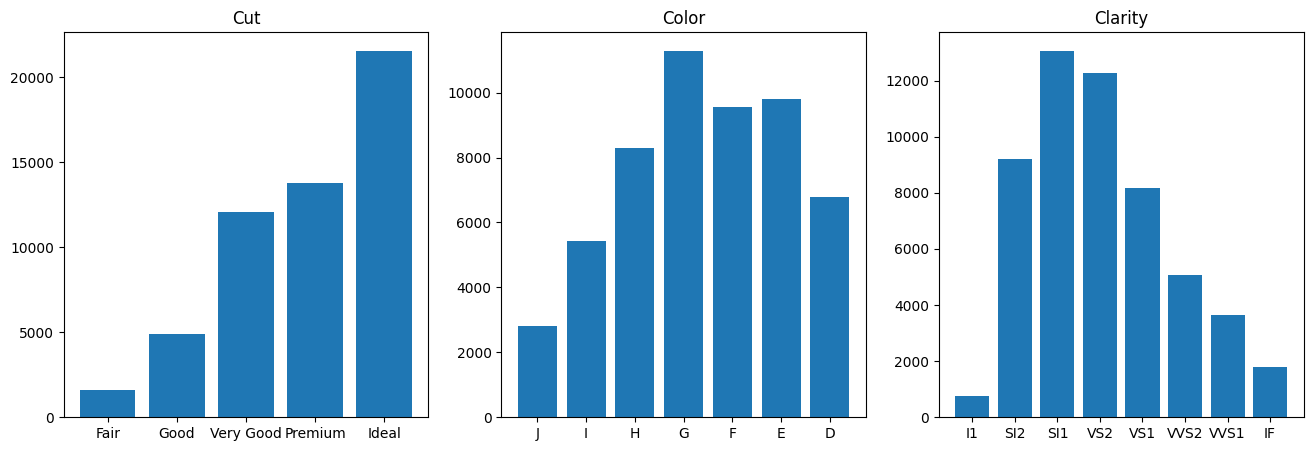

In [17]:
# Tworzenie wykresów z matplotlib ->
# używam figure do stworzenia figury wykresy i następnie subplot, żeby wyrysować kilka wykresów na jednej figurze (obok siebie)

plt.figure(figsize=(16,5))

plt.subplot(131) # 131 czyli pozycjonowanie wykresu w osi
x = np.arange(5) # 5 bo jest 5 klas w 'cut'
plt.bar(x, data.cut.value_counts(ascending=True)) # wyrysowanie bar plota
plt.xticks(x, data.cut.value_counts(ascending=True).index) # wypisanie labelów dla osi x -> czyli 'Fair', 'Good' itd
plt.title('Cut') # Tytuł wykresu

plt.subplot(132)
x = np.arange(7)
plt.bar(x, color_series)
plt.xticks(x, color_series.index)
plt.title('Color')

plt.subplot(133)
x = np.arange(8)
plt.bar(x, clarity_series)
plt.xticks(x, clarity_series.index)
plt.title('Clarity')

plt.show()

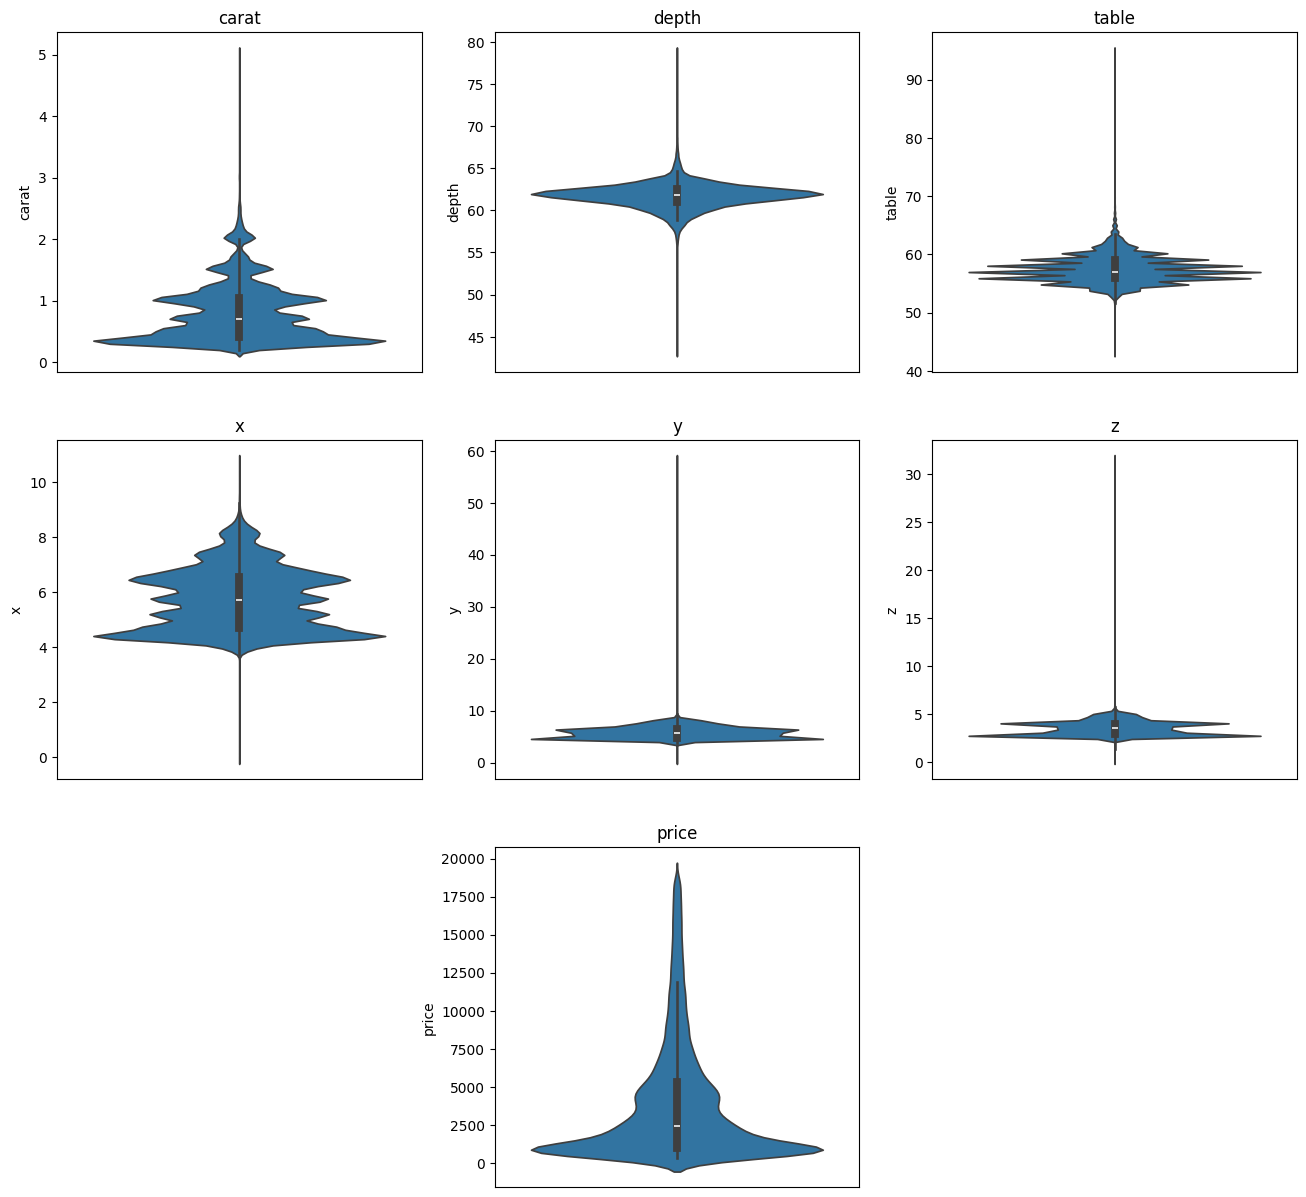

In [18]:
# To samo co wyżej tylko violin plot z rozkładem wartości zamiast bar plota

fig = plt.figure(figsize=(16,15))

plt.subplot(331)
sns.violinplot(data=data.carat)
plt.title('carat')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(332)
sns.violinplot(data=data.depth)
plt.title('depth')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(333)
sns.violinplot(data=data.table)
plt.title('table')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(334)
sns.violinplot(data=data.x)
plt.title('x')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(335)
sns.violinplot(data=data.y)
plt.title('y')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(336)
sns.violinplot(data=data.z)
plt.title('z')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(338)
sns.violinplot(data=data.price)
plt.title('price')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.savefig('rozklady.pdf', bbox_inches='tight')

plt.show()

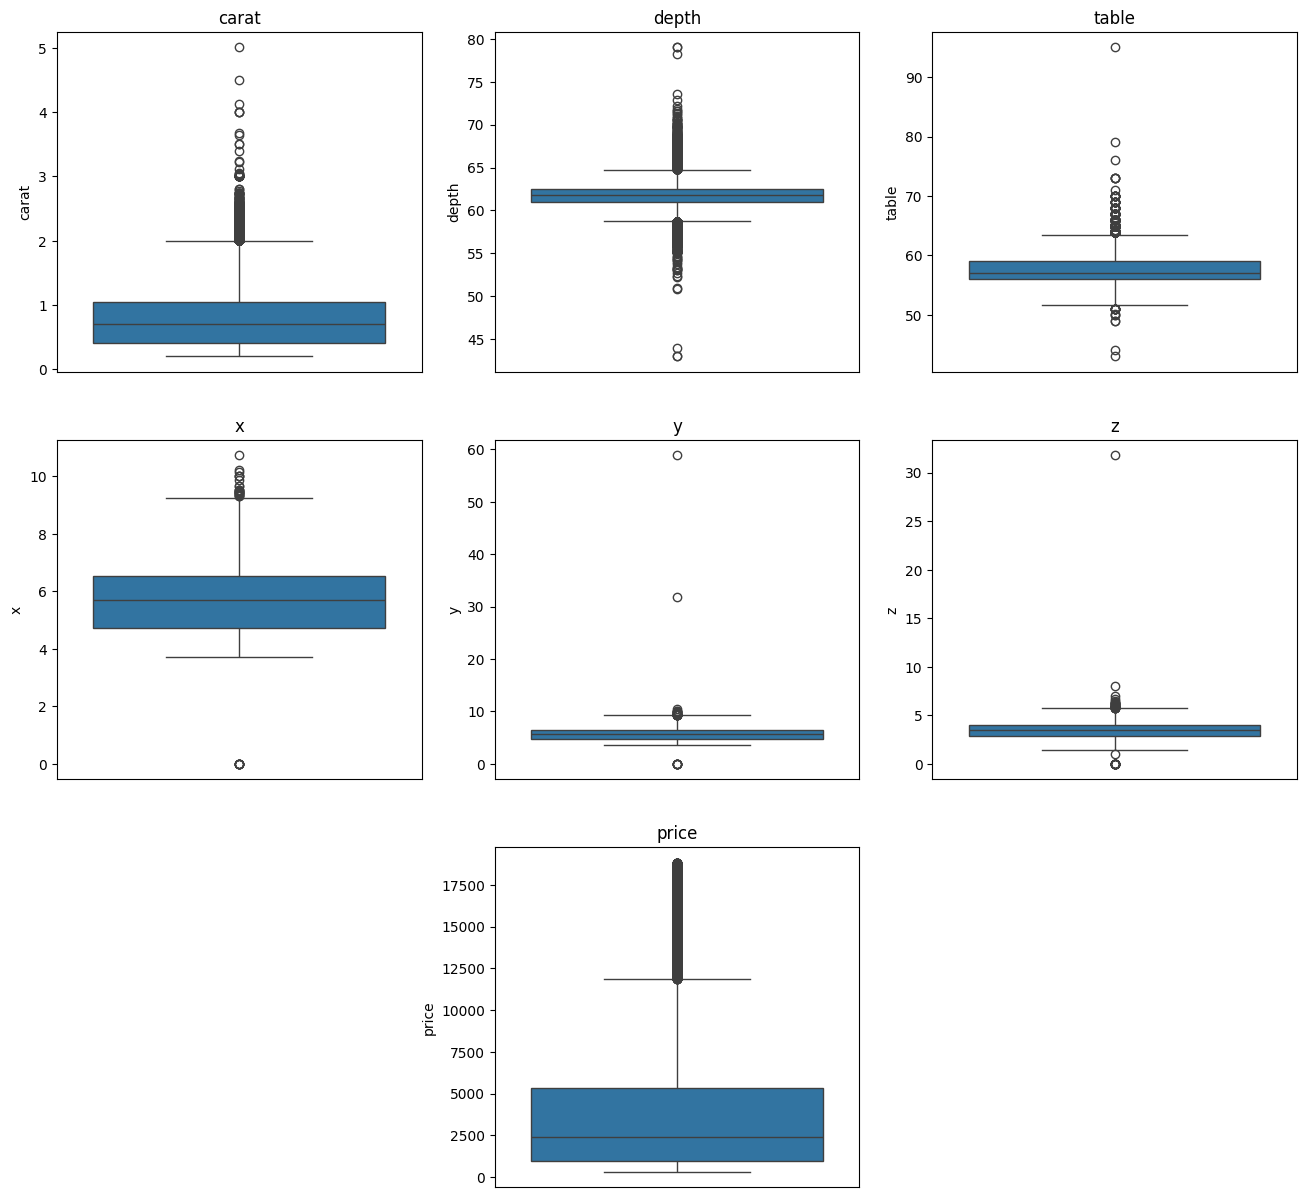

In [19]:
# j.w. boxplot, czyli rozkłady (50% w boxie), range danych + outliery 

fig = plt.figure(figsize=(16,15))

plt.subplot(331)
sns.boxplot(data=data.carat)
plt.title('carat')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(332)
sns.boxplot(data=data.depth)
plt.title('depth')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(333)
sns.boxplot(data=data.table)
plt.title('table')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(334)
sns.boxplot(data=data.x)
plt.title('x')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(335)
sns.boxplot(data=data.y)
plt.title('y')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(336)
sns.boxplot(data=data.z)
plt.title('z')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.subplot(338)
sns.boxplot(data=data.price)
plt.title('price')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.savefig('boxy.pdf', bbox_inches='tight')

plt.show()

In [20]:
# Wyszukanie rekordów w danych gdzie, któraś z kolumn x,y,z jest równa 0

data.loc[ (data.x == 0) | (data.y == 0) | (data.z == 0) ]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [21]:
# Liczba rekordów, dla powyższego filtra

len(data.loc[ (data.x == 0) | (data.y == 0) | (data.z == 0) ])

20

In [22]:
# Filtr wyszukujący rekordy gdzie kolumna 'z' ma wartość większą niż 10

data.loc[data.z >= 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [23]:
data.loc[data.y >= 20]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [24]:
# Wypisanie rekordów o podobnych wartościach karatu i wymiarów

data.loc[(data.carat >= 1.99) & (data.carat <= 2.01) & (data.z >= 6)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
26194,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16


In [25]:
# Filtr rekordy o najniższej wartości depth

data.loc[data.depth == data.depth.min()]

,carat,cut,color,clarity,depth,table,price,x,y,z
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12


In [26]:
# Filtr rekordy o nawyższej wartości depth

data.loc[data.depth == data.depth.max()]

,carat,cut,color,clarity,depth,table,price,x,y,z
52860,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


# Preprocessing

In [27]:
# Labeling -> zamiana wartości tekstowych na numeryczne. Tutaj podmiana na hierarchię

data.color = data.color.replace(['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                [0, 1, 2, 3, 4, 5, 6])
data.clarity = data.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
                                    [0, 1, 2, 3, 4, 5, 6, 7])
data.cut = data.cut.replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                            [0, 1, 2, 3, 4])

C:\Users\domin\AppData\Local\Temp\ipykernel_28884\404207794.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.color = data.color.replace(['D', 'E', 'F', 'G', 'H', 'I', 'J'],
C:\Users\domin\AppData\Local\Temp\ipykernel_28884\404207794.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.clarity = data.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
C:\Users\domin\AppData\Local\Temp\ipykernel_28884\404207794.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [28]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75


# PCA
### Cut

In [29]:
# PCA 'względem' cut, wydzielenie cut jako zmiennej zależnej

data_pca = data.select_dtypes(include=['float64', 'int64'])

X = data_pca
y = data.cut

In [30]:
# Transformacja danych przez model PCA -> redukcja wymiarowości do 2D macierzy

from sklearn.decomposition import PCA

pca2D = PCA(n_components=2)

components = pca2D.fit_transform(data_pca)

print(pca2D.explained_variance_ratio_) # Wypisanie wariancji w danych jaką zmienne po transformacji (Principal components) pokrywaja 

print(np.sum(pca2D.explained_variance_ratio_)) # Suma pokrytej wariancji przez obie zmienne (0.9999 -> czyli prawie całość informacji została zachowana po transformacji)

[9.99999093e-01 3.48312126e-07]
0.9999994414147185


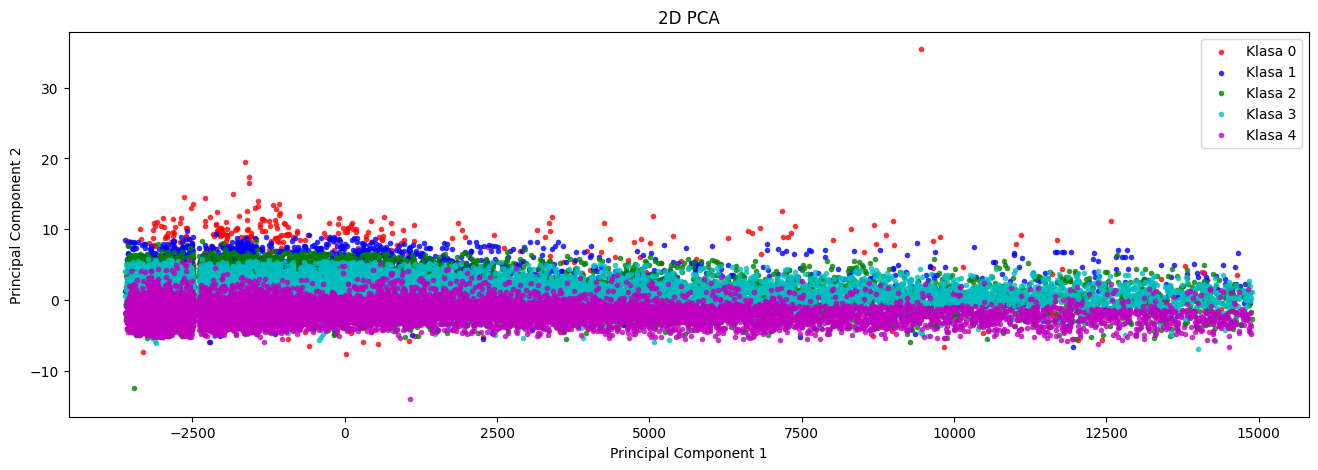

In [31]:
# Wyrysowanie Prinicipal components na wykresie, punkty labelowane po 'cut', można zobaczyć że dane są dobrze wydzielone,
# czyli możemy się spodziewać, że potencjalne predykcje dla 'cut' powinny być całkiem niezłe

X_np = X.to_numpy()
y_np = y.to_numpy()

plt.figure(figsize=(16,5))
colors = ['r', 'b', 'g', 'c', 'm']
lw = 0.00001

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4']):
    plt.scatter(components[y_np == i, 0], components[y_np == i, 1], color=color, alpha=.8, lw=lw, label=target_name, s=16)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca2d_cut.pdf', bbox_inches='tight')

plt.show()

In [32]:
# To samo tylko wydzielenie 3 principal components -> wynikowa redukcja danych do macierzy 3D
# Trochę bez sensu zważywszy na pokrycie wariancji przez 2 pierwsze principal komponenty, ale jak jest to zostawiłem
pca3D = PCA(n_components=3)

components = pca3D.fit_transform(data_pca)

print(pca3D.explained_variance_ratio_)
print(np.sum(pca3D.explained_variance_ratio_))

[9.99999093e-01 3.48312126e-07 1.84345789e-07]
0.9999996257605074


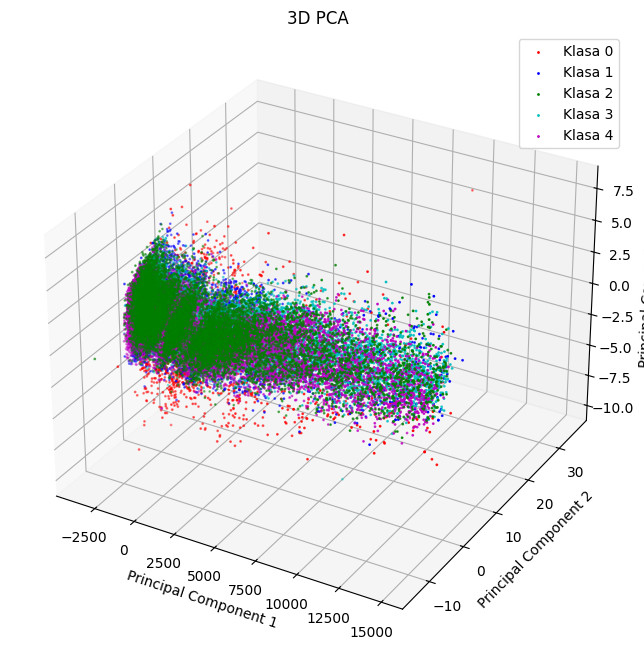

In [33]:
# Wyrysowanie wykresu 3D dla 3 principal components

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

c4 = components[y_np == 4, :]
c3 = components[y_np == 3, :]
c2 = components[y_np == 2, :]
c1 = components[y_np == 1, :]
c0 = components[y_np == 0, :]


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D PCA')
scatter1 = ax.scatter(c0[:,0], c0[:,1], c0[:,2], c='r', marker='o', s=1)
scatter2 = ax.scatter(c1[:,0], c1[:,1], c1[:,2], c='b', marker='o', s=1)
scatter3 = ax.scatter(c2[:,0], c2[:,1], c2[:,2], c='g', marker='o', s=1)
scatter4 = ax.scatter(c3[:,0], c3[:,1], c3[:,2], c='c', marker='o', s=1)
scatter5 = ax.scatter(c4[:,0], c4[:,1], c4[:,2], c='m', marker='o', s=1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.legend([scatter1, scatter2, scatter3, scatter4, scatter5], 
          ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4'])
plt.savefig('pca3d_cut.pdf', bbox_inches='tight')
plt.show()

# PCA
### Color

In [34]:
# Cały powyższy proces powtórzony względem atrybutu 'color' wydzielonego jako zmienna zależna

data_pca = data.select_dtypes(include=['float64', 'int64'])

X = data_pca
y = data.color

from sklearn.decomposition import PCA

pca2D = PCA(n_components=2)

components = pca2D.fit_transform(data_pca)

print(pca2D.explained_variance_ratio_)

print(np.sum(pca2D.explained_variance_ratio_))

[9.99999093e-01 3.48312126e-07]
0.9999994414147185


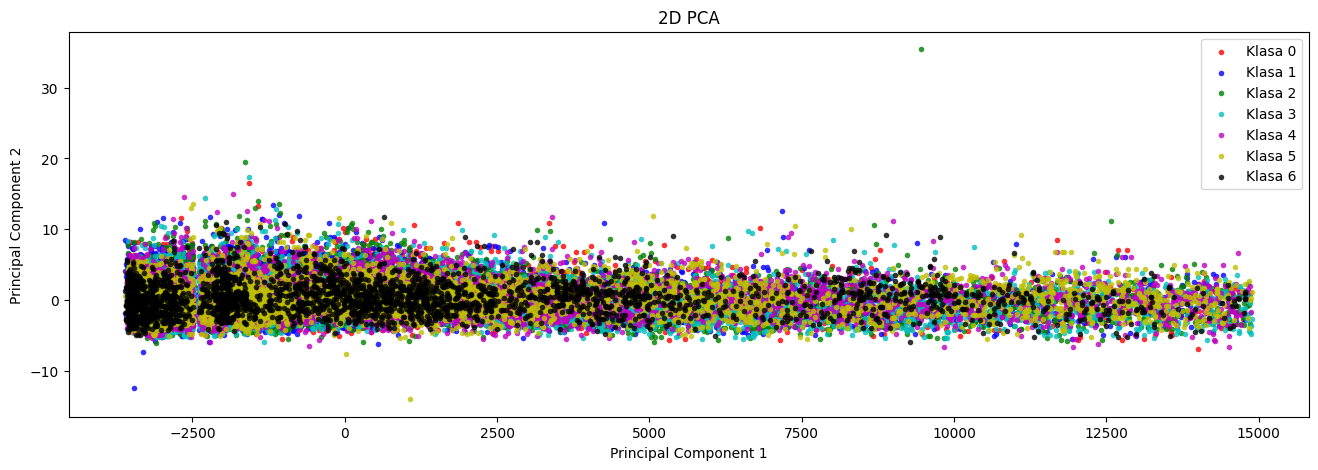

In [35]:
X_np = X.to_numpy()
y_np = y.to_numpy()

plt.figure(figsize=(16,5))
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
lw = 0.00001

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], 
                                 ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4', 'Klasa 5', 'Klasa 6']):
    plt.scatter(components[y_np == i, 0], components[y_np == i, 1], color=color, alpha=.8, lw=lw, label=target_name, s=16)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca2d_color.pdf', bbox_inches='tight')

plt.show()

In [36]:
# 3D
pca3D = PCA(n_components=3)

components = pca3D.fit_transform(data_pca)

print(pca3D.explained_variance_ratio_)
print(np.sum(pca3D.explained_variance_ratio_))

[9.99999093e-01 3.48312126e-07 1.84345789e-07]
0.9999996257605074


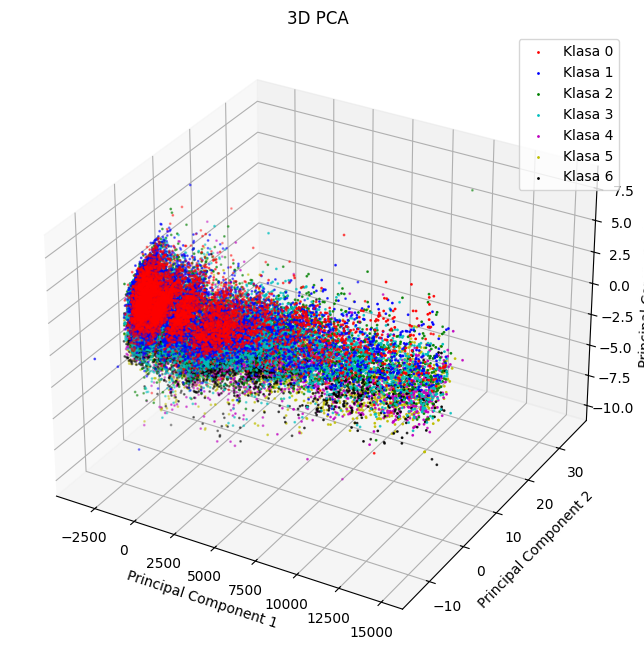

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

c6 = components[y_np == 6, :]
c5 = components[y_np == 5, :]
c4 = components[y_np == 4, :]
c3 = components[y_np == 3, :]
c2 = components[y_np == 2, :]
c1 = components[y_np == 1, :]
c0 = components[y_np == 0, :]


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D PCA')
scatter1 = ax.scatter(c0[:,0], c0[:,1], c0[:,2], c='r', marker='o', s=1)
scatter2 = ax.scatter(c1[:,0], c1[:,1], c1[:,2], c='b', marker='o', s=1)
scatter3 = ax.scatter(c2[:,0], c2[:,1], c2[:,2], c='g', marker='o', s=1)
scatter4 = ax.scatter(c3[:,0], c3[:,1], c3[:,2], c='c', marker='o', s=1)
scatter5 = ax.scatter(c4[:,0], c4[:,1], c4[:,2], c='m', marker='o', s=1)
scatter6 = ax.scatter(c5[:,0], c5[:,1], c5[:,2], c='y', marker='o', s=1)
scatter7 = ax.scatter(c6[:,0], c6[:,1], c6[:,2], c='k', marker='o', s=1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.legend([scatter1, scatter2, scatter3, scatter4, scatter5, scatter6, scatter7], 
          ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4', 'Klasa 5', 'Klasa 6'])
plt.savefig('pca3d_color.pdf', bbox_inches='tight')
plt.show()

# PCA
### Clarity

In [38]:
# Cały powyższy proces powtórzony względem atrybutu 'clarity' wydzielonego jako zmienna zależna

data_pca = data.select_dtypes(include=['float64', 'int64'])

X = data_pca
y = data.clarity

from sklearn.decomposition import PCA

pca2D = PCA(n_components=2)

components = pca2D.fit_transform(data_pca)

print(pca2D.explained_variance_ratio_)

print(np.sum(pca2D.explained_variance_ratio_))

[9.99999093e-01 3.48312126e-07]
0.9999994414147185


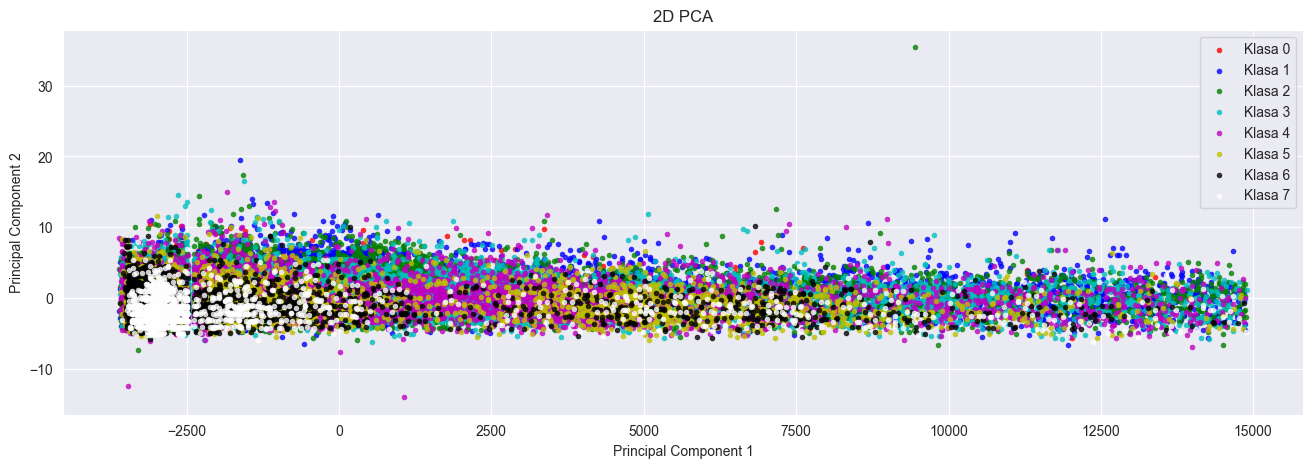

In [39]:
X_np = X.to_numpy()
y_np = y.to_numpy()

plt.figure(figsize=(16,5))

sns.set_style('darkgrid')
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'w']
lw = 0.00001

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7], 
                                 ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4', 'Klasa 5', 'Klasa 6', 'Klasa 7']):
    plt.scatter(components[y_np == i, 0], components[y_np == i, 1], color=color, alpha=.8, lw=lw, label=target_name, s=16)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca2d_clarity.pdf', bbox_inches='tight')

plt.show()

In [40]:
# 3D
pca3D = PCA(n_components=3)

components = pca3D.fit_transform(data_pca)

print(pca3D.explained_variance_ratio_)
print(np.sum(pca3D.explained_variance_ratio_))

[9.99999093e-01 3.48312126e-07 1.84345789e-07]
0.9999996257605074


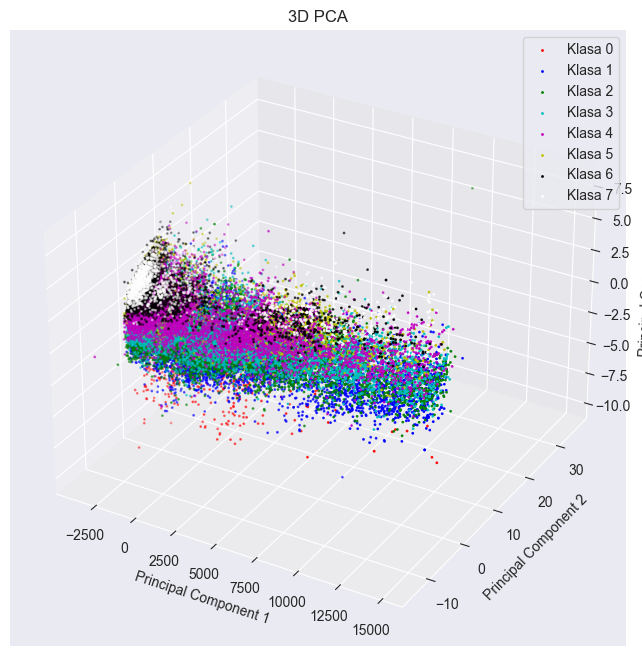

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

c7 = components[y_np == 7, :]
c6 = components[y_np == 6, :]
c5 = components[y_np == 5, :]
c4 = components[y_np == 4, :]
c3 = components[y_np == 3, :]
c2 = components[y_np == 2, :]
c1 = components[y_np == 1, :]
c0 = components[y_np == 0, :]


fig = plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D PCA')
scatter1 = ax.scatter(c0[:,0], c0[:,1], c0[:,2], c='r', marker='o', s=1)
scatter2 = ax.scatter(c1[:,0], c1[:,1], c1[:,2], c='b', marker='o', s=1)
scatter3 = ax.scatter(c2[:,0], c2[:,1], c2[:,2], c='g', marker='o', s=1)
scatter4 = ax.scatter(c3[:,0], c3[:,1], c3[:,2], c='c', marker='o', s=1)
scatter5 = ax.scatter(c4[:,0], c4[:,1], c4[:,2], c='m', marker='o', s=1)
scatter6 = ax.scatter(c5[:,0], c5[:,1], c5[:,2], c='y', marker='o', s=1)
scatter7 = ax.scatter(c6[:,0], c6[:,1], c6[:,2], c='k', marker='o', s=1)
scatter8 = ax.scatter(c7[:,0], c7[:,1], c7[:,2], c='w', marker='o', s=1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.legend([scatter1, scatter2, scatter3, scatter4, scatter5, scatter6, scatter7, scatter8], 
          ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4', 'Klasa 5', 'Klasa 6', 'Klasa 7'])
plt.savefig('pca3d_clarity.pdf', bbox_inches='tight')
plt.show()

# Choosing decision attribute

### Cut

In [42]:
# Tutaj sprawdzenie rozkładów (violin plot) różnych zmiennych względem potencjalnej zmiennej zależnej, najpierw dla 'cut'

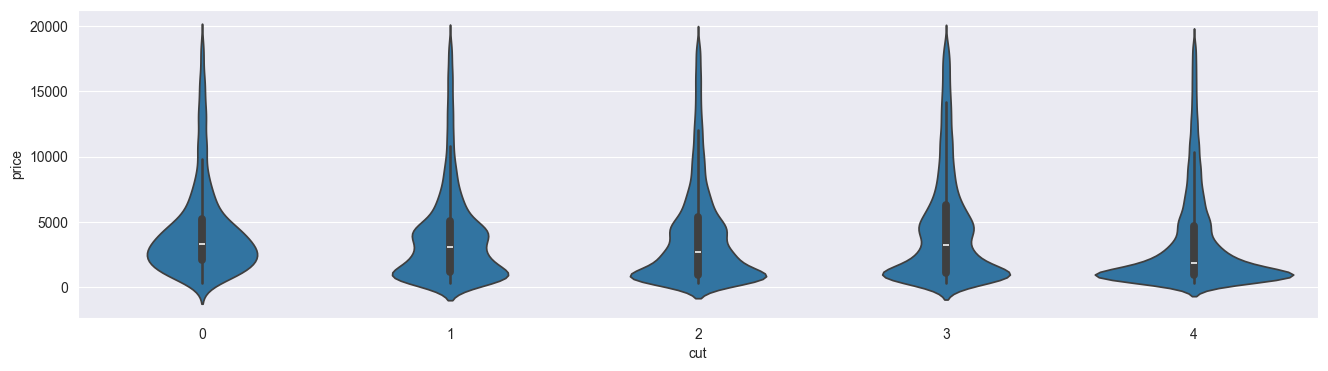

In [43]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="cut", y="price", data=data)

plt.savefig('cut_price.pdf', bbox_inches='tight')

plt.show()

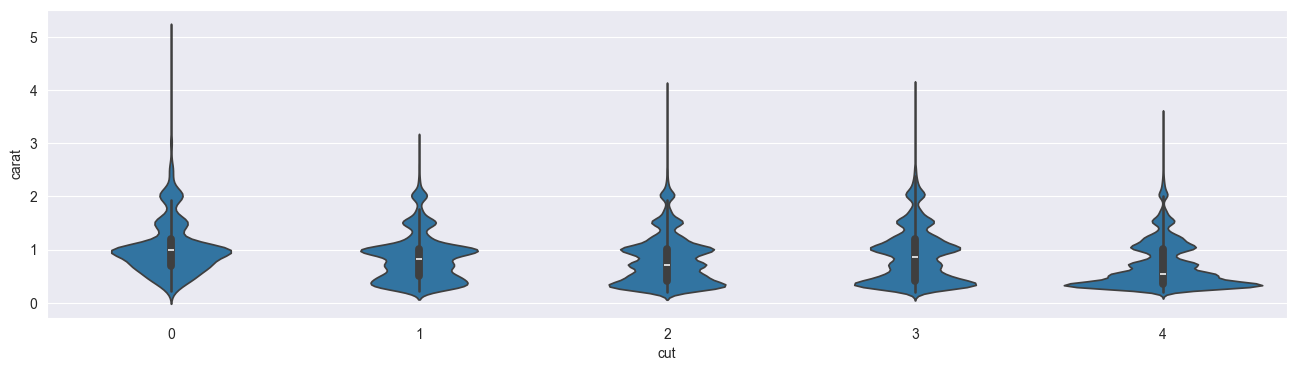

In [44]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="cut", y="carat", data=data)

plt.savefig('cut_carat.pdf', bbox_inches='tight')

plt.show()

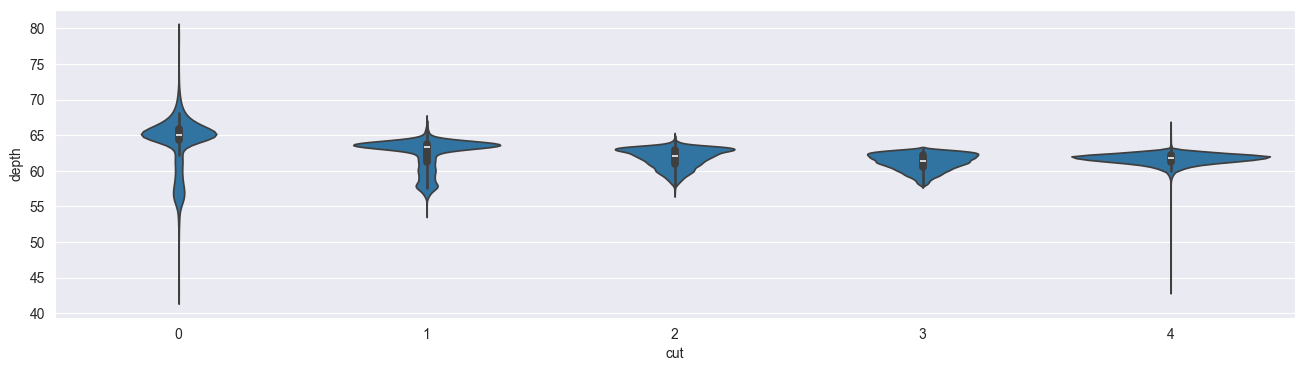

In [45]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="cut", y="depth", data=data)

plt.savefig('cut_depth.pdf',bbox_inches='tight')

plt.show()

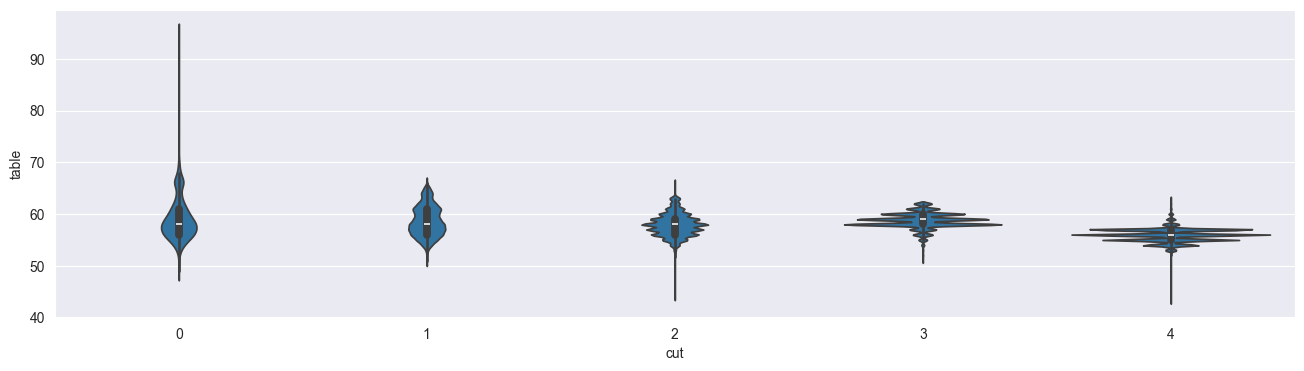

In [46]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="cut", y="table", data=data)

plt.savefig('cut_table.pdf', bbox_inches='tight')

plt.show()

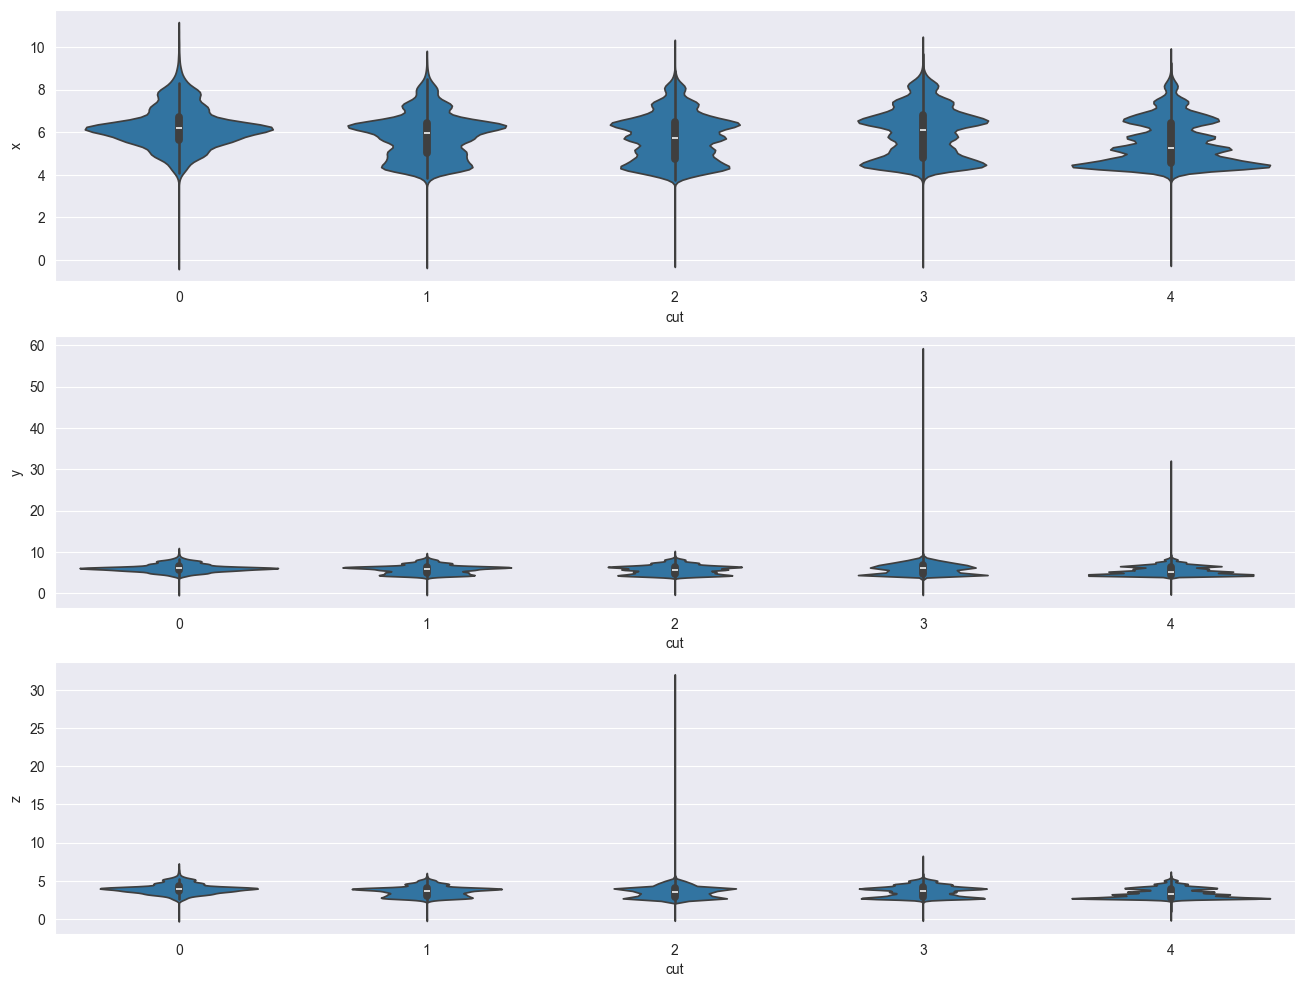

In [47]:
plt.figure(figsize=(16,12))

plt.subplot(311)
ax = sns.violinplot(x="cut", y="x", data=data)
plt.subplot(312)
ax2 = sns.violinplot(x="cut", y="y", data=data)
plt.subplot(313)
ax3 = sns.violinplot(x="cut", y="z", data=data)

plt.savefig('cut_xyz.pdf', bbox_inches='tight')

plt.show()

### Color

In [48]:
# J.W dla color

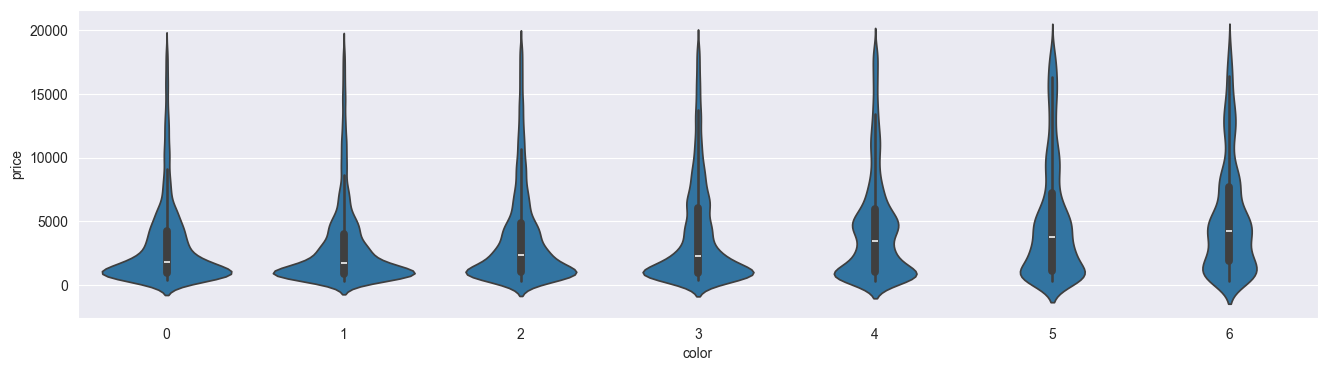

In [49]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="color", y="price", data=data)

plt.savefig('color_price.pdf', bbox_inches='tight')

plt.show()

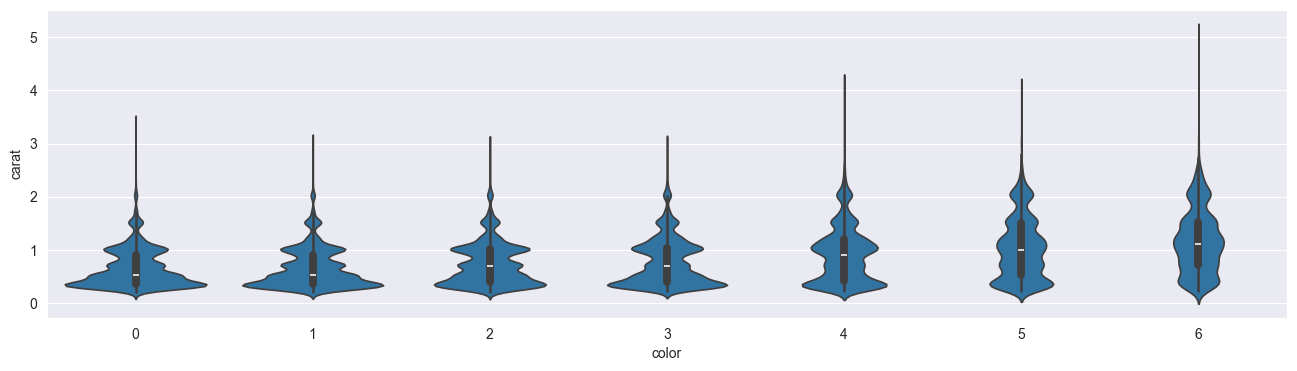

In [50]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="color", y="carat", data=data)

plt.savefig('color_carat.pdf', bbox_inches='tight')

plt.show()

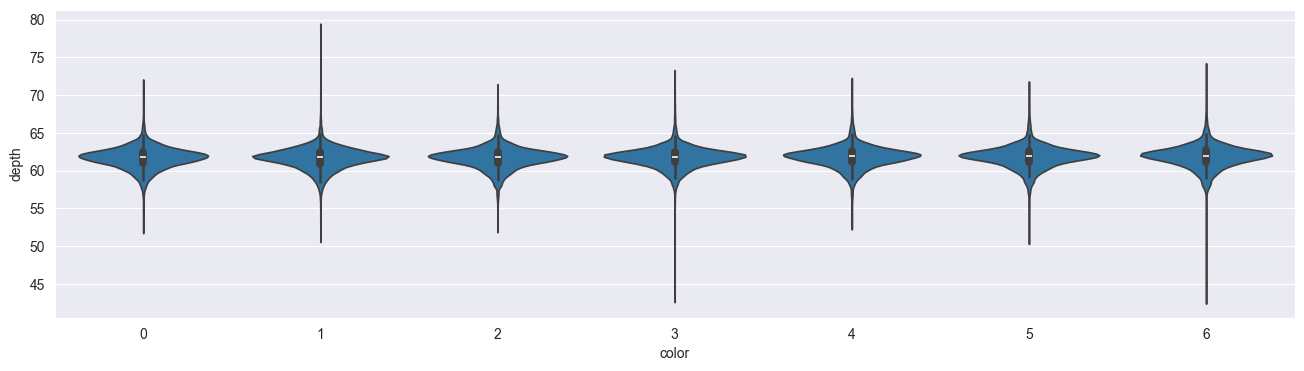

In [51]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="color", y="depth", data=data)

plt.savefig('color_depth.pdf', bbox_inches='tight')

plt.show()

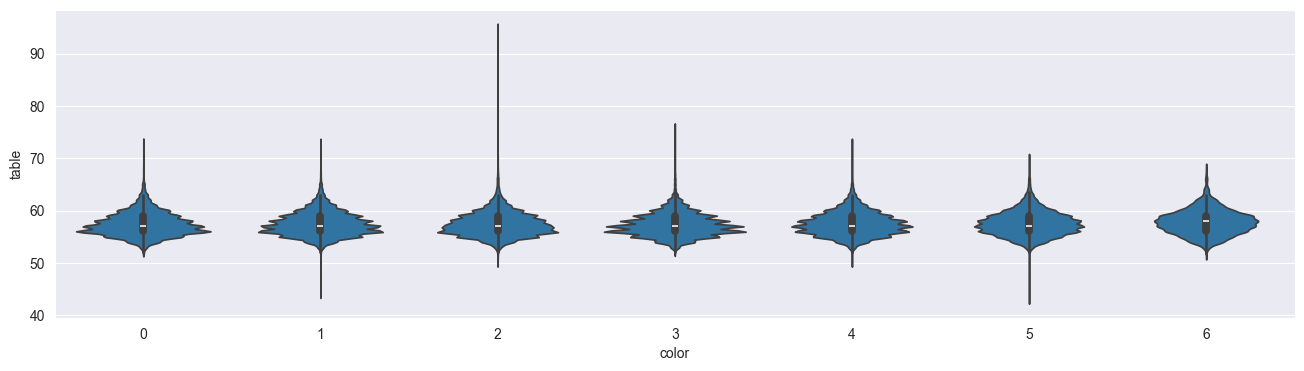

In [52]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="color", y="table", data=data)

plt.savefig('color_table.pdf', bbox_inches='tight')

plt.show()

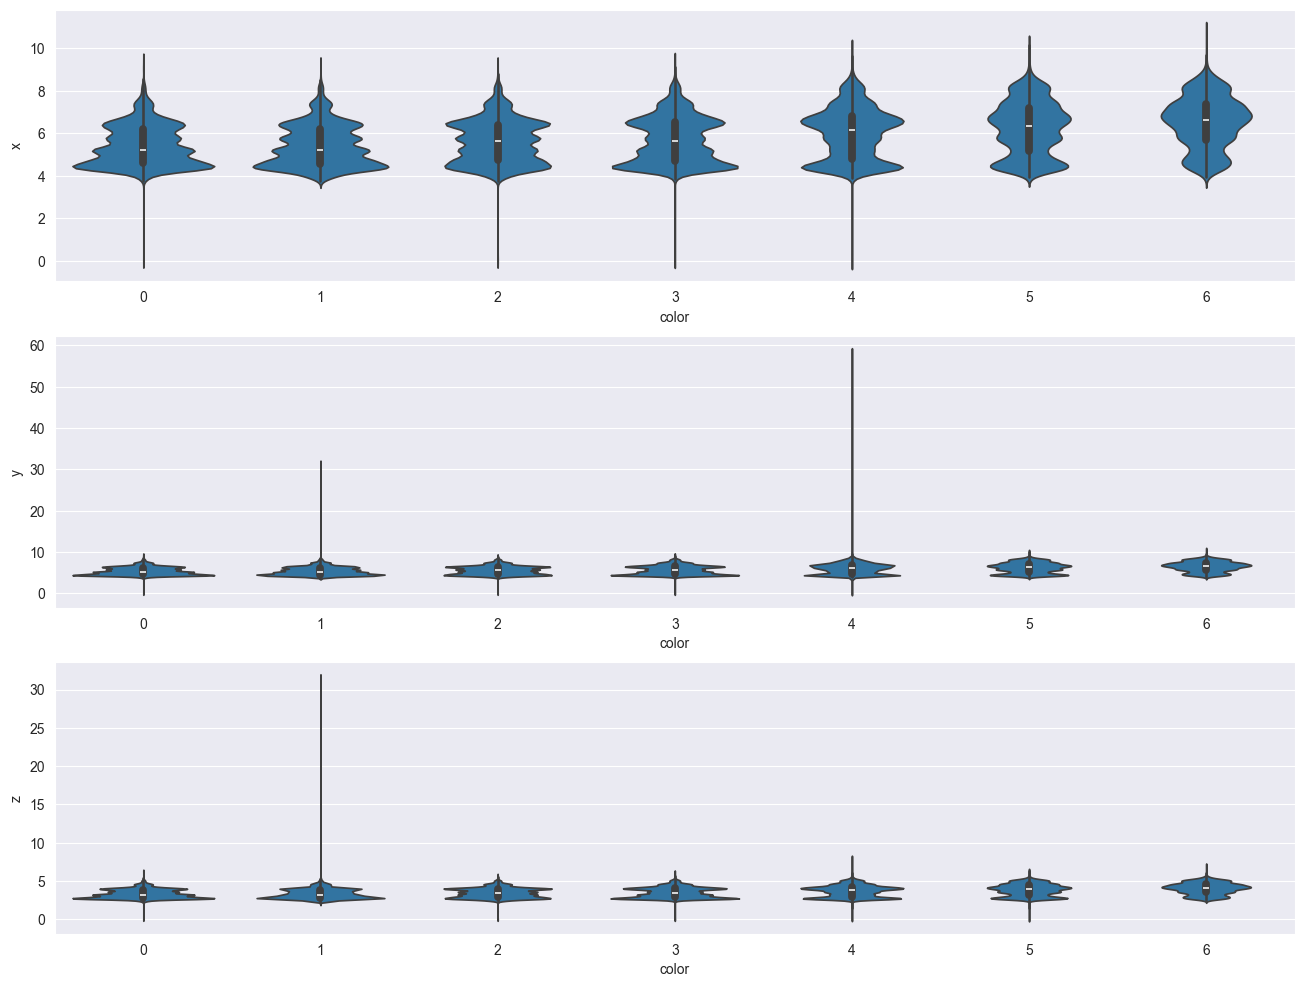

In [53]:
plt.figure(figsize=(16,12))

plt.subplot(311)
ax = sns.violinplot(x="color", y="x", data=data)
plt.subplot(312)
ax2 = sns.violinplot(x="color", y="y", data=data)
plt.subplot(313)
ax3 = sns.violinplot(x="color", y="z", data=data)

plt.savefig('color_xyz.pdf', bbox_inches='tight')

plt.show()

### Clarity

In [54]:
# J.W dla clarity

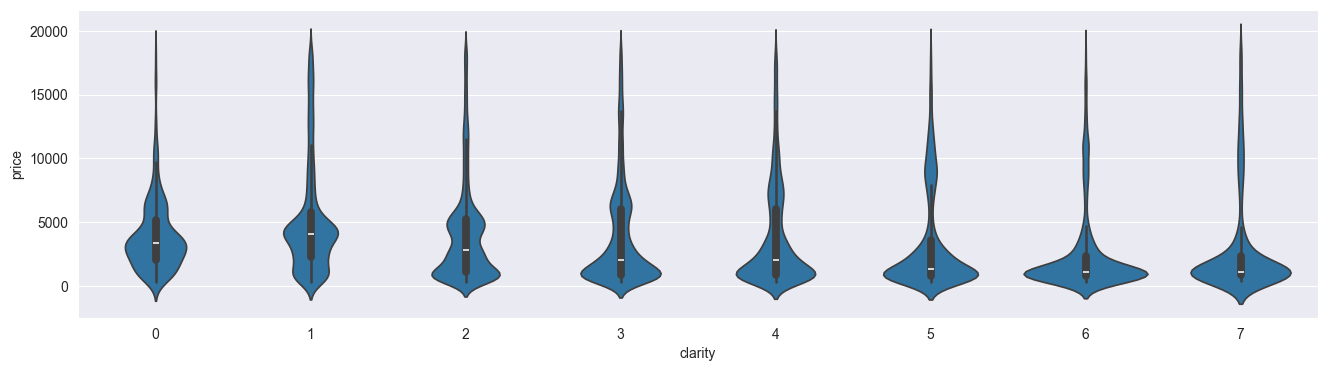

In [55]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="clarity", y="price", data=data)

plt.savefig('clarity_price.pdf', bbox_inches='tight')

plt.show()

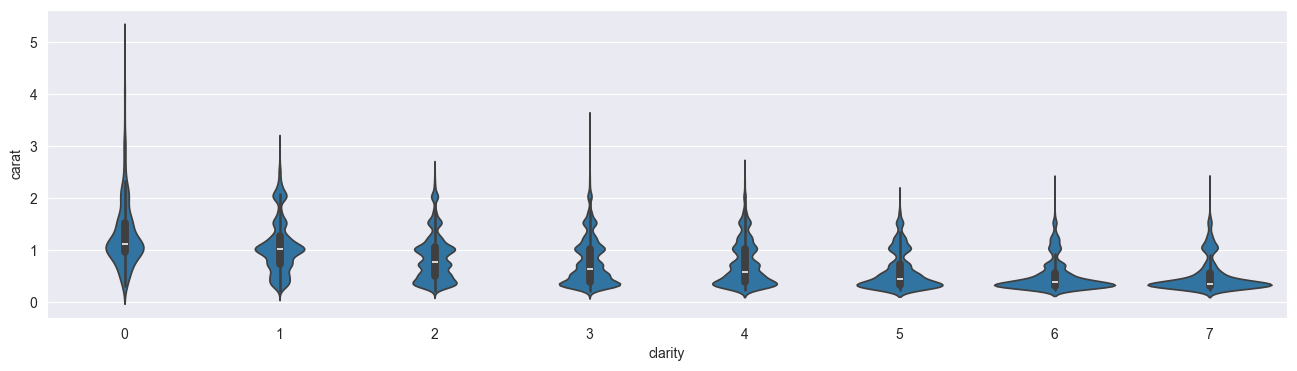

In [56]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="clarity", y="carat", data=data)

plt.savefig('clarity_carat.pdf', bbox_inches='tight')

plt.show()

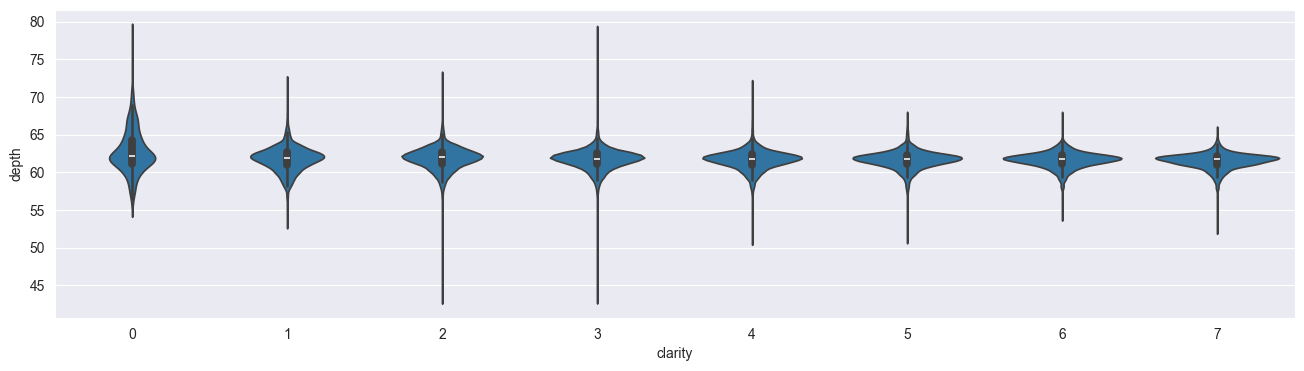

In [57]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="clarity", y="depth", data=data)

plt.savefig('clarity_depth.pdf', bbox_inches='tight')

plt.show()

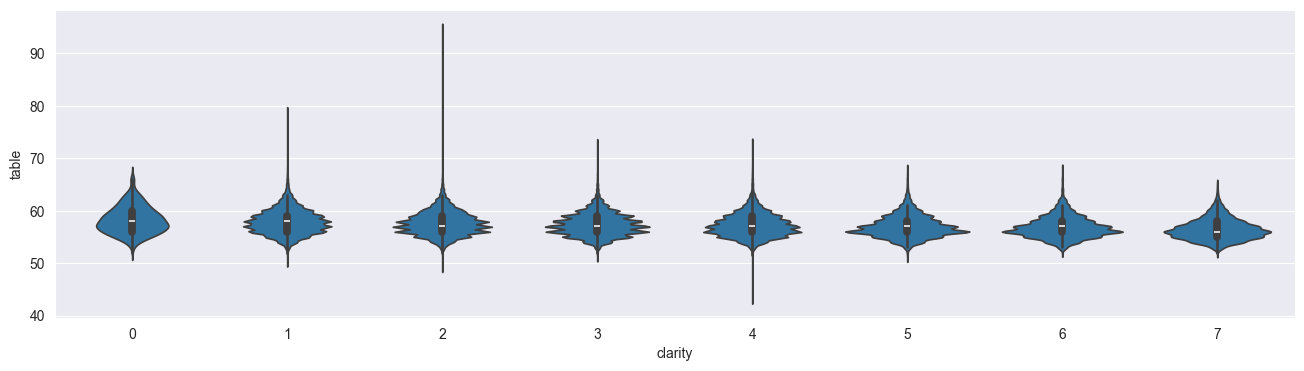

In [58]:
plt.figure(figsize=(16,4))

ax = sns.violinplot(x="clarity", y="table", data=data)

plt.savefig('clarity_table.pdf', bbox_inches='tight')

plt.show()

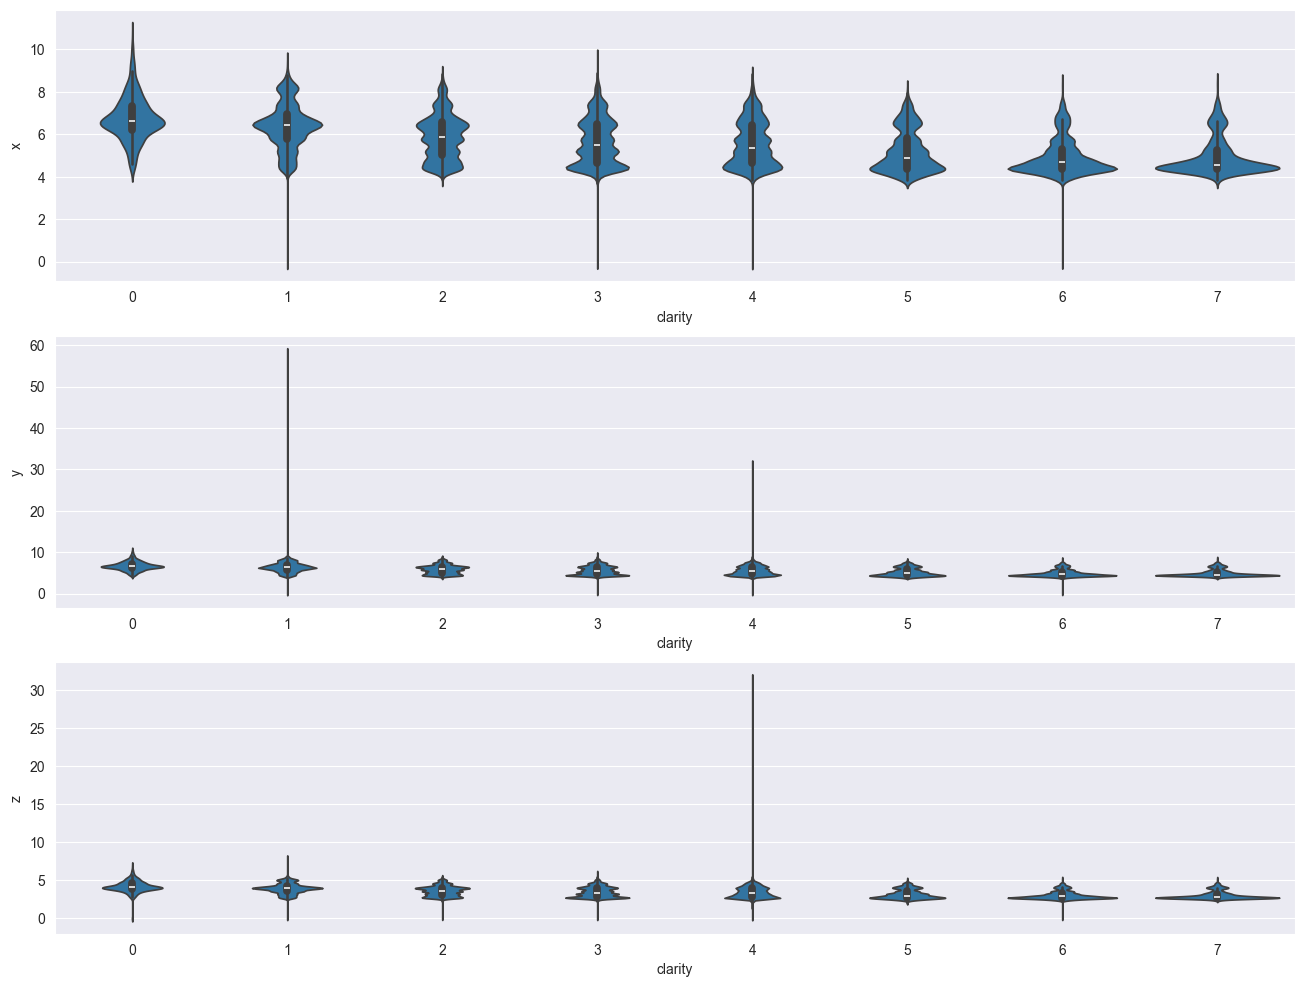

In [59]:
plt.figure(figsize=(16,12))

plt.subplot(311)
ax = sns.violinplot(x="clarity", y="x", data=data)
plt.subplot(312)
ax2 = sns.violinplot(x="clarity", y="y", data=data)
plt.subplot(313)
ax3 = sns.violinplot(x="clarity", y="z", data=data)

plt.savefig('clarity_xyz.pdf', bbox_inches='tight')

plt.show()

# ANOVA

In [60]:
# Tutaj używamy testu statystycznego ANOVA, zeby sprawdzić relację pomiędzy zmienną kategoryczną 
# (dla nas potencjalna zmienna zależna, jedna z: cut, color, clarity), a zmienną numeryczną 
# (jedna z pozostałych: 'price' , 'carat', 'depth', 'table', 'x', 'y', 'z' )
# 
# W tym wypadku policzenie zwykłej korelacji jest raczej niespecjalnie pomocne, ze względu na 
# kategoryczna naturę zmiennej predykcyjnej, stąd ANOVA

from scipy import stats # scipy.stats importuje metodę f_oneway dla policzenia ANOVA

corr_matrix = np.empty((3, 7)) # dla zebrania wyników wszystkich relacji (korelacji) tworzymy pustą macierz

decis = ['cut', 'color', 'clarity'] # wydzielenie potencjalnych zmiennych zależnych
attrs = ['price' , 'carat', 'depth', 'table', 'x', 'y', 'z'] # wydzielenie zmiennych predykcyjnych

# pętla po decyzyjnych, wewnątrz po predykcyjnych dla policzenia każdej korelacji.
# Robimy to przez enumerate(), bo enumerate zwraca nam elementy z listy + index
# dzięki tym indeksom zbieramy wszystkie poszczególne wyniki w macierzy utworzonej wyżej corr_matrix
for id_dec, dec in enumerate(decis):
    for id_att, att in enumerate(attrs):
        if dec == 'cut':
            F, p = stats.f_oneway(data[data[dec]==0][att], data[data[dec]==1][att], data[data[dec]==2][att], 
                                  data[data[dec]==3][att], data[data[dec]==4][att])
        elif dec == 'color':
            F, p = stats.f_oneway(data[data[dec]==0][att], data[data[dec]==1][att], data[data[dec]==2][att], 
                                  data[data[dec]==3][att], data[data[dec]==4][att], data[data[dec]==5][att], 
                                  data[data[dec]==6][att])
        elif dec == 'clarity':
            F, p = stats.f_oneway(data[data[dec]==0][att], data[data[dec]==1][att], data[data[dec]==2][att], 
                                  data[data[dec]==3][att], data[data[dec]==4][att], data[data[dec]==5][att], 
                                  data[data[dec]==6][att], data[data[dec]==7][att])
        corr_matrix[id_dec, id_att] = F

print(corr_matrix)

[[ 175.68871735  495.69425927 1897.40858653 6367.17943377  489.39426962
   395.72020284  489.39820842]
 [ 290.20588071  927.67475305   23.58242623   27.42708698  779.06676011
   737.75247042  766.91984036]
 [ 215.01926041 1224.79551536   78.91883134  207.34374099 1340.02650364
  1231.71915704 1294.81377961]]


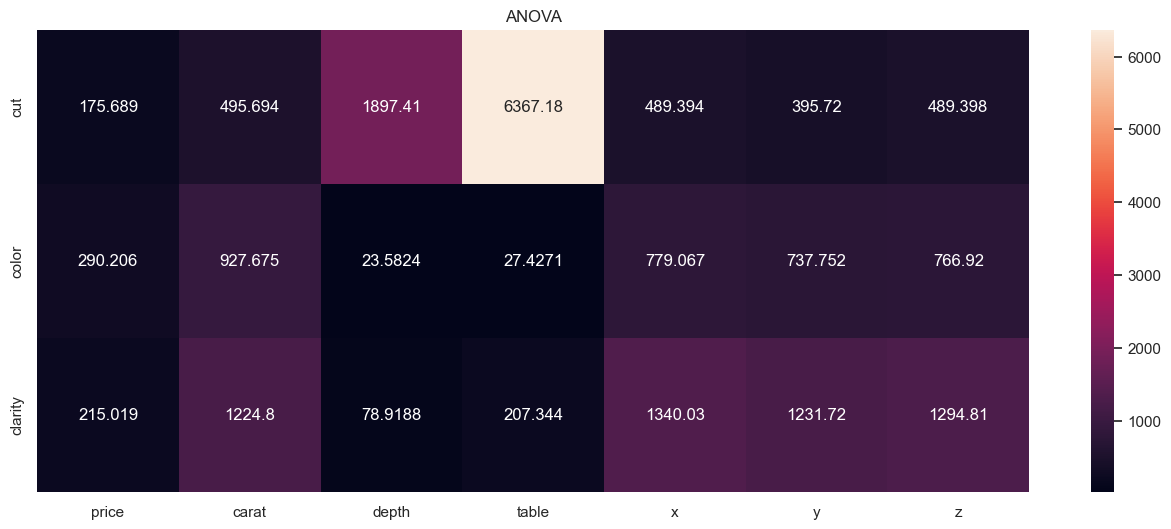

In [61]:
# Tworzymy wykres korelacji, który uzyskaliśmy wyżej, przez seaborn dla lepszej kolorystyki

sns.set()
acc_df = pd.DataFrame(corr_matrix, index=decis, columns=attrs)
plt.figure(figsize=(16,6))
ax = sns.heatmap(acc_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
plt.title('ANOVA')
plt.show()

# Import sklearn modules

In [62]:
# Importujemy modele predykcyjne i metody dla kroswalidacji z scikit learn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Binary Class
#### Cut: Ideal = 1, Others = 0

In [63]:
# Przypadek dla binaryzowanych danych. Robimy replace żeby uzyskać binarne dane (0, 1)

data_bin = data.copy()
data_bin.cut = data.cut.replace([0, 1, 2, 3], 0)
data_bin.cut = data_bin.cut.replace(4, 1)
data_bin.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0,6,1,63.3,58.0,335,4.34,4.35,2.75


In [64]:
# Liczebność klas dla nowych uzyskancyh danych binarnych. Czyli 1 = 21551 przypadków dla cut 'Ideal'

data_bin.cut.value_counts()

cut
0    32389
1    21551
Name: count, dtype: int64

In [65]:
# Wydzielenie zmiennej zależnej do y. Zmienne predykcyjne, czyli cala reszta kolumn do X

y = data_bin.cut
X = data_bin.drop('cut', axis=1)

In [66]:
# Wyuczenie modeli drzew decyzyjnych, dla 10-foldowej kroswalidacji (powstaje 10 modeli dla 10 różnych podziałow danych). 
# Wypisanie średniego wyniku i odchylenia standardowego uzyskanego w kroswalidacji

clf = DecisionTreeClassifier()

score = cross_val_score(clf, X, y, cv=10)

print(f"Score: {np.mean(score)} +- {np.std(score)}")

Score: 0.485558027437894 +- 0.2288514573172341


In [67]:
clf = GaussianNB()

score = cross_val_score(clf, X, y, cv=10)

print(f"Score: {np.mean(score)} +- {np.std(score)}")

Score: 0.7444568038561366 +- 0.07533300093989326


In [68]:
clf = KNeighborsClassifier()

score = cross_val_score(clf, X, y, cv=10)

print(f"Score: {np.mean(score)} +- {np.std(score)}")

Score: 0.24818316648127547 +- 0.22784958678228087


### Approach with one hot used on 'Color'

In [76]:
# Tutaj dodatkowy eksperyment w którym podmieniamy hierarchiczną relację w kolumnie color (wartości od 1 do 7) na 
# odmienne kolumny binarne, które wskazują kolor (używamy metody get_dummies)

X.color = X.color.replace([0, 1, 2, 3, 4, 5, 6], ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

one_hot = pd.get_dummies(X.color)
X = X.drop('color', axis = 1)
X = X.join(one_hot)
X.head()

,carat,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,False,True,False,False,False,False,False
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,False,True,False,False,False,False,False
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,False,True,False,False,False,False,False
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,True,False
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,False,False,False,False,False,False,True


In [77]:
# Ponownie proces j.w. tylko dla uzyskanych danych j.w

clf = DecisionTreeClassifier()

score = cross_val_score(clf, X, y, cv=10)

print(f"Score: {np.mean(score)} +- {np.std(score)}")

Score: 0.47589914720059323 +- 0.22744775870476003


In [78]:
clf = GaussianNB()

score = cross_val_score(clf, X, y, cv=10)

print(f"Score: {np.mean(score)} +- {np.std(score)}")

Score: 0.7412495365220615 +- 0.07138215351144471


In [79]:
clf = KNeighborsClassifier()

score = cross_val_score(clf, X, y, cv=10)

print(f"Score: {np.mean(score)} +- {np.std(score)}")

Score: 0.24951798294401187 +- 0.228989375024886


# Multi Class

In [66]:
# Dane bez binaryzowania 'cut' -> multi class classification

data_multi = data.copy()
data_multi.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75


In [67]:
# wydzielenie zmiennej zależnej

y = data_multi.cut
X = data_multi.drop(['cut'], axis=1)

In [68]:
# Dodajemy F1 score dla lepszej ewaluacji w problemach multi class z niezrównoważonymi klasami
scoring = ['accuracy', 'f1_weighted']

# Dodajemy randomizowane foldowanie z równym rozkładem wszystkich klas w foldach 
# (praktyka dla niezrównoważonego zbioru danych)
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

clf = DecisionTreeClassifier()

cv_results = cross_validate(clf, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.7167593622543567 +- 0.003898331647994271
Mean F1 score: 0.7170554019710331 +- 0.0035867679801835878


In [82]:
clf = GaussianNB()

cv_results = cross_validate(clf, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.575083426028921 +- 0.005524532601316766
Mean F1 score: 0.5484070861583996 +- 0.006315175082487385


In [83]:
clf = KNeighborsClassifier()

cv_results = cross_validate(clf, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.5363181312569523 +- 0.005413581044092019
Mean F1 score: 0.5257225827370375 +- 0.005485662848120216


In [84]:
clf = QuadraticDiscriminantAnalysis()

cv_results = cross_validate(clf, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.5705228031145718 +- 0.01211789106639689
Mean F1 score: 0.5346170129898413 +- 0.020237887975625226


In [85]:
clf = SVC()

cv_results = cross_validate(clf, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

KeyboardInterrupt: 

In [ ]:
clf = MLPClassifier()

cv_results = cross_validate(clf, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

# Multiclass with scaling

In [69]:
y = data_multi.cut
X = data_multi.drop(['cut'], axis=1)

In [70]:
clf = DecisionTreeClassifier()

scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('clf', clf)])

cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.7148127549128662 +- 0.004331215593745106
Mean F1 score: 0.7151965338082809 +- 0.004124603408249915


In [91]:
clf = GaussianNB()

scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('clf', clf)])

cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.5740266963292548 +- 0.005043219284483773
Mean F1 score: 0.5485172891718214 +- 0.005687576151366134


In [92]:
clf = KNeighborsClassifier()

scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('clf', clf)])

cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.660938079347423 +- 0.00656371166298444
Mean F1 score: 0.6537875832006181 +- 0.006705285429922806


In [93]:
clf = QuadraticDiscriminantAnalysis()

scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('clf', clf)])

cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.5705228031145718 +- 0.01211789106639689
Mean F1 score: 0.5346170129898413 +- 0.020237887975625226


In [94]:
clf = SVC()

scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('clf', clf)])

cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

Mean Accuracy: 0.7498331479421579 +- 0.008261127297604354
Mean F1 score: 0.739506333693884 +- 0.00848398839645955


In [95]:
clf = MLPClassifier()

scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('clf', clf)])

cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, return_train_score=True)

# Display results
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()} +- {cv_results['test_accuracy'].std()}")
print(f"Mean F1 score: {cv_results['test_f1_weighted'].mean()} +- {cv_results['test_f1_weighted'].std()}")

d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: Convergenc

Mean Accuracy: 0.7779940674823878 +- 0.007539405753636302
Mean F1 score: 0.7742356068193795 +- 0.007487130929040237


d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Hyperparameter tuning

In [72]:
# wybór najlepszego baseline modelu - MLPClassifier i hyperparameter tuning

from sklearn.metrics import make_scorer

clf = MLPClassifier(max_iter=100)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

# Tworzymy grid w którym w listach dodajemy wartości parametrów modelu do ewaluacji
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'classifier__alpha': [0.0001, 0.001]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# GridSearch CV ewaluuje modele w dokładnie ten sam sposób jak robiliśmy poprzednio, 
# z tym, że wykonuje to dla wielu różnych parametrów (takich jakie skonfigurowaliśmy w pram_grid)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_weighted',
    cv=stratified_kfold,
    return_train_score=True
)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

print("\nDetailed Results:")
results = grid_search.cv_results_
for mean_acc, std_acc, mean_f1, std_f1, params in zip(
    results['mean_test_accuracy'],
    results['std_test_accuracy'],
    results['mean_test_f1_weighted'],
    results['std_test_f1_weighted'],
    results['params']
):
    print(
        f"Params: {params}, "
        f"Accuracy: {mean_acc:.4f} ± {std_acc}, "
        f"F1 Score: {mean_f1:.4f} ± {std_f1}"
    )

d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: Convergenc

Best Parameters: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (50, 50)}
Best Cross-Validated Accuracy: 0.7882275667040032

Detailed Results:
Params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50,)}, Accuracy: 0.7746 ± 0.005920919326166582, F1 Score: 0.7697 ± 0.006507134126857563
Params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100,)}, Accuracy: 0.7769 ± 0.007171164555681228, F1 Score: 0.7723 ± 0.007153691743212454
Params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50)}, Accuracy: 0.7902 ± 0.00649229202484241, F1 Score: 0.7865 ± 0.006783775790612612
Params: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (50,)}, Accuracy: 0.7745 ± 0.008358736922317837, F1 Score: 0.7697 ± 0.009113114163918992
Params: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}, Accuracy: 0.7765 ± 0.008135779306881304, F1 Score: 0.7728 ± 0.007925007024922145
Params: {'classifier__alpha': 0.00

d:\Conda\envs\llm\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
